#  **ANÁLISE DE DADOS DE VENDAS**

In [ ]:
# Instalação das bibliotecas
%pip install pandas matplotlib seaborn

In [3]:
# Importando as bibliotecas

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Conectar ao banco de dados (ou criar um novo se não existir)
conexao = sqlite3.connect('dados_vendas.db')

In [5]:
# Cria um cursor
cursor = conexao.cursor()

In [6]:
# Cria a tabela vendas
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

In [7]:
# Inserir dados na tabela vendas
vendas_data = [
    ('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
    ('2023-01-05', 'Produto B', 'Roupas', 350.00),
    ('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
    ('2023-03-15', 'Produto D', 'Livros', 200.00),
    ('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
    ('2023-04-02', 'Produto F', 'Roupas', 400.00),
    ('2023-05-05', 'Produto G', 'Livros', 150.00),
    ('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
    ('2023-07-20', 'Produto I', 'Roupas', 600.00),
    ('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
    ('2023-09-30', 'Produto K', 'Livros', 300.00),
    ('2023-10-05', 'Produto L', 'Roupas', 450.00),
    ('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
    ('2023-12-20', 'Produto N', 'Livros', 250.00)
]

# Usando executemany para inserir múltiplos registros
cursor.executemany('''
INSERT INTO vendas (data_venda, produto, categoria, valor_venda) VALUES (?, ?, ?, ?)
''', vendas_data)

In [ ]:
# Confirmar as mudanças

conexao.commit()

In [8]:
# Carregar os dados em um DataFrame
df_vendas = pd.read_sql_query("SELECT * FROM vendas", conexao)

In [9]:
# Exibir as primeiras linhas do DataFrame
print(df_vendas.head())

   id_venda  data_venda    produto    categoria  valor_venda
0         1  2023-01-01  Produto A  Eletrônicos       1500.0
1         2  2023-01-05  Produto B       Roupas        350.0
2         3  2023-02-10  Produto C  Eletrônicos       1200.0
3         4  2023-03-15  Produto D       Livros        200.0
4         5  2023-03-20  Produto E  Eletrônicos        800.0


In [10]:
# Análise total de vendas por categoria
vendas_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().reset_index()
print(vendas_por_categoria)

     categoria  valor_venda
0  Eletrônicos       6100.0
1       Livros        900.0
2       Roupas       1800.0


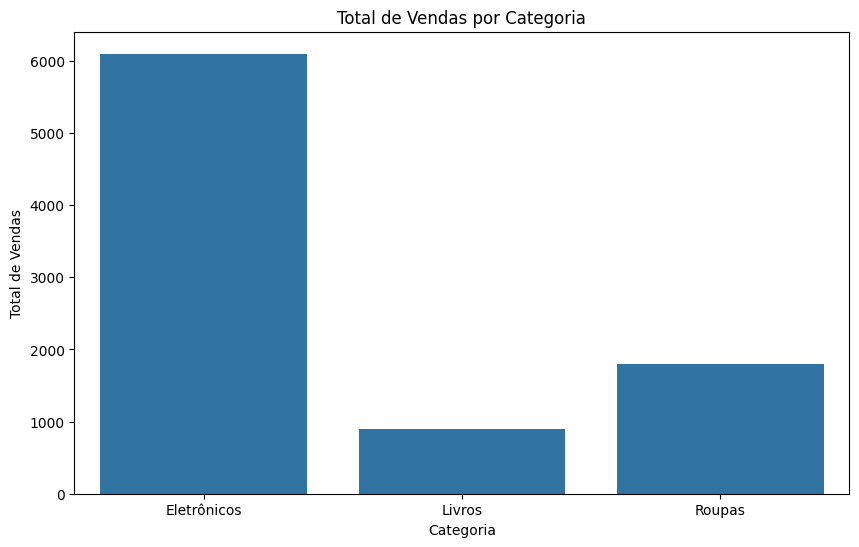

In [11]:
# Gráfico de barras das vendas por categoria
plt.figure(figsize=(10,6))
sns.barplot(x='categoria', y='valor_venda', data=vendas_por_categoria)
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.show()

In [12]:
# Fecha a conexão com o banco de dados
conexao.close()

### **Insights Obtidos**

##### Os insights obtidos a partir da análise de vendas revelaram que a categoria **"Eletrônicos"** teve o melhor desempenho, destacando uma forte preferência do consumidor por produtos tecnológicos, enquanto as categorias **"Roupas"** e **"Livros"** vendas significativamente menores, proporcionando oportunidades de melhoria. Para maximizar os resultados, recomendamos continuar investindo em marketing para eletrônicos e explorar promoções específicas para roupas e livros, além de realizar pesquisas para entender melhor as preferências dos consumidores.